In [134]:

from datetime import datetime
COLORS_7 = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f']

#from analsis.analsis_utils.plot_utils import plot_num_uses_global_local
#from analsis.analsis_utils.utils import collect_num_uses_different_exp, prepare_data_of_used_features
import matplotlib.pyplot as plt
from typing import List, Optional, Dict, Tuple
from matplotlib.patches import Patch
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f']


In [145]:

def prepare_data_of_used_features(
        used_features_dict: Dict[str, List[str]],
) -> Tuple[List[str], List[str], List[str], List[str]]:
    global_features = ['modularity',
                       'entropy',
                       'normed_entropy',
                       'max_connectivity_between_layers_per_layer_3',
                       'total_connectivity_ratio_between_layers_0',
                       'total_connectivity_ratio_between_layers_3',
                       'density',
                       'motifs_0',
                       'motifs_1',
                       'motifs_2',
                       ]
    features = []
    num_uses = []
    bar_colors = []
    bar_labels = []
    for k, v in used_features_dict.items():
        features.append(k)
        num_uses.append(len(v))
        if k in global_features:
            bar_colors.append(COLORS[0])
            bar_labels.append('global')
        else:
            bar_colors.append(COLORS[1])
            bar_labels.append('local')
    sorted_vals = [(x, y, z, t) for x, y, z, t in sorted(zip(num_uses, features, bar_colors, bar_labels), reverse=True)]
    features = []
    num_uses = []
    bar_colors = []
    bar_labels = []
    for num_uses_, feature_, bar_color_, bar_label_ in sorted_vals:
        num_uses.append(num_uses_)
        features.append(feature_)
        bar_colors.append(bar_color_)
        bar_labels.append(bar_label_)
    return num_uses, features, bar_colors, bar_labels


def collect_num_uses_different_exp(
        base_path: str,
        csvs_mapping: Dict[str, str],
        num_features: int,
) -> Dict[str, List[str]]:
    used_features_dict = {}
    for algo_name, csv_path in csvs_mapping.items():
        selected_features_df = pd.read_csv(f"{base_path}/{csv_path}").drop("Unnamed: 0", axis=1).rename(
            columns={'connectivity_ratio': 'density'})
        selected_features = selected_features_df[selected_features_df.sum(axis=1) == num_features]
        selected_feature_names = selected_features[selected_features == 1].dropna(axis=1).columns
        for feature_name in selected_feature_names:
            if feature_name not in used_features_dict:
                used_features_dict[feature_name] = []
            used_features_dict[feature_name].append(algo_name)
    return used_features_dict
def plot_num_uses_global_local(
        num_uses: List[str],
        features: List[str],
        bar_colors: List[str],
        bar_labels: List[str],
        time_str: str,
        title_sufix: str = 'all tasks and feature selection methods',
        local_base_path: Optional[str] = None,
):
    plt.figure(figsize=(8, 10))
    plt.bar(features, num_uses, color=bar_colors)
    cmap = dict(zip(bar_labels, bar_colors))
    patches = [Patch(color=v, label=k) for k, v in cmap.items()]
    leg = []
    for l in bar_labels:
        if l not in leg:
            leg.append(l)
    plt.legend(labels=leg, handles=patches, )
    plt.xticks(rotation=30, ha='right')
    plt.title(f'Feature frequency for 5 features reduction over {title_sufix}', wrap=True)
    plt.tight_layout()
    if local_base_path:
        plt.savefig(
            f"{local_base_path}/plots/top_features/{time_str}_top_feature_analsis_{title_sufix}.png")


In [146]:
time_str = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")

base_path = '/Volumes/noamaz/modularity/teach_archs'
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
num_features = 5

retina_used_features_csv_path_lighgbm = 'retina/retina_lightgbm_feature_selection/exp_2023-04-25-12-22-31/2023-05-04-12-30-24_used_features.csv'
xor_used_features_csv_path_lighgbm = f"xor/xor_lightgbm_feature_selection/exp_2023-04-25-13-56-23/2023-05-04-12-37-34_used_features.csv"
digit_used_features_csv_path_lighgbm = 'digits/digits_lightgbm_feature_selection/exp_2023-07-01-10-52-11/2023-07-06-11-28-10_used_features.csv'

retina_used_features_csv_path_xgboost = 'retina/retina_xgboost_feature_selection/exp_2023-04-29-16-49-26/2023-04-29-16-49-26_used_features.csv'
xors_used_features_csv_path_xgboost = 'xor/xor_xgboost_feature_selection/exp_2023-05-01-13-20-50/2023-05-04-12-41-42_used_features.csv'
#digit_used_features_csv_path_xgboost = 'digits/digits_xgboost_feature_selection/exp_2023-07-02-11-23-11/2023-07-02-14-03-03_2200_2400_used_features.csv'

csvs_mapping = {
    'retina_lightgbm': retina_used_features_csv_path_lighgbm,
    'retina_xgboost': retina_used_features_csv_path_xgboost,
    'xor_lightgbm': xor_used_features_csv_path_lighgbm,
    'xor_xgboost': xors_used_features_csv_path_xgboost,
    'digit_lightgbm': digit_used_features_csv_path_lighgbm,
    #   'digit_xgboost': digit_used_features_csv_path_xgboost,

}

In [147]:
used_features = collect_num_uses_different_exp(
    base_path=base_path,
    csvs_mapping=csvs_mapping,
    num_features=num_features,
)

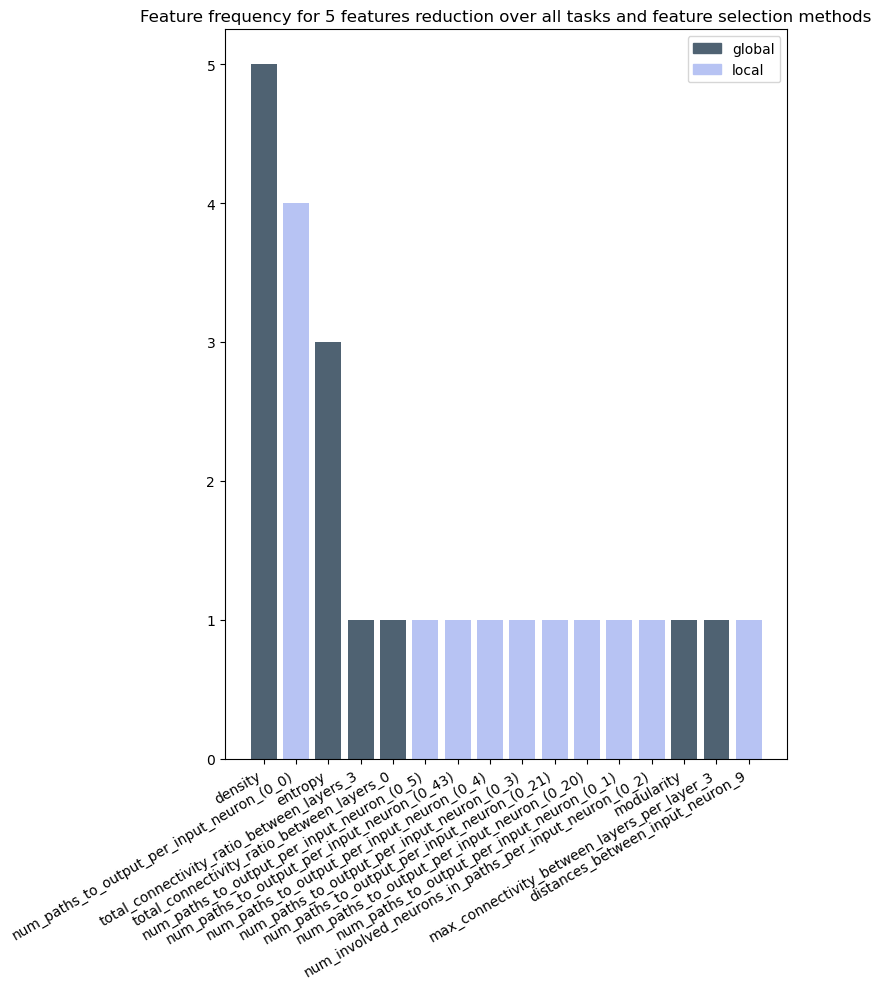

In [148]:
num_uses, features, bar_colors, bar_labels = prepare_data_of_used_features(
    used_features_dict=used_features,
)
plot_num_uses_global_local(
    num_uses,
    features,
    bar_colors,
    bar_labels,
    time_str=time_str,
    local_base_path=local_base_path,
)

In [156]:

base_path = '/Volumes/noamaz/modularity/teach_archs'
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
num_features = 5

retina_used_features_csv_path_lighgbm_no_mod_with_mot = 'retina/retina_lightgbm_feature_selection/with_motifs_no_modularity/exp_2023-08-01-11-26-20/2023-08-01-11-26-20_1_20_used_features.csv'
xor_used_features_csv_path_lighgbm_no_mod_with_mot = "xor/xor_lightgbm_feature_selection/with_motifs_no_modularity/exp_2023-08-01-11-52-46/2023-08-01-11-52-46_1_20_used_features.csv"

retina_used_features_csv_path_xgboost_no_mod_with_mot = 'retina/retina_xgboost_feature_selection/with_motifs_no_modularity/exp_2023-08-01-12-34-01/2023-08-01-12-34-01_1_20_used_features.csv'
xor_used_features_csv_path_xgboost_no_mod_with_mot = "xor/xor_xgboost_feature_selection/with_motifs_no_modularity/exp_2023-08-01-12-38-42/2023-08-01-12-38-42_1_20_used_features.csv"

csvs_mapping_no_mod_with_mot = {
    'retina_lightgbm': retina_used_features_csv_path_lighgbm_no_mod_with_mot,
    'retina_xgboost': retina_used_features_csv_path_xgboost_no_mod_with_mot,
    'xor_lightgbm': xor_used_features_csv_path_lighgbm_no_mod_with_mot,
    'xor_xgboost': xor_used_features_csv_path_xgboost_no_mod_with_mot,

}

In [150]:
used_features_no_mod_with_mot = collect_num_uses_different_exp(
    base_path=base_path,
    csvs_mapping=csvs_mapping_no_mod_with_mot,
    num_features=num_features,
)

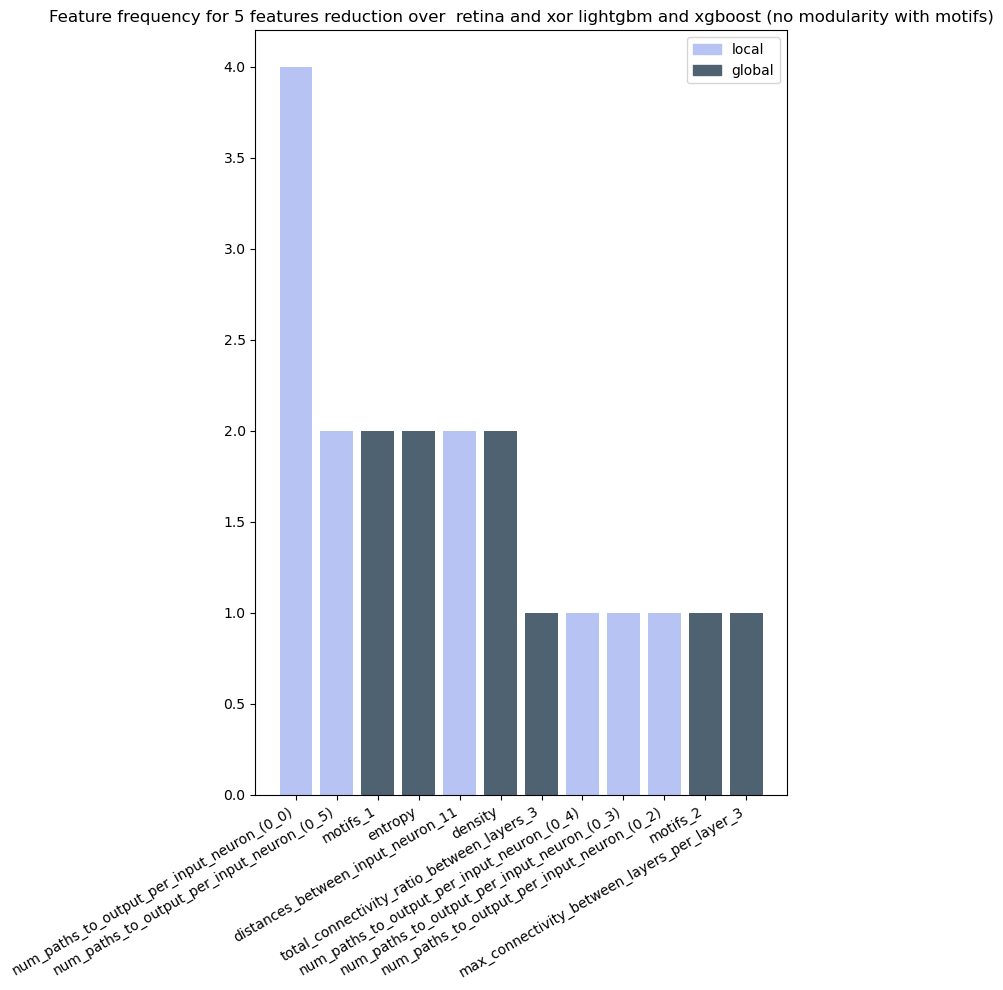

In [154]:
num_uses, features, bar_colors, bar_labels = prepare_data_of_used_features(used_features_no_mod_with_mot)
plot_num_uses_global_local(num_uses, features, bar_colors, bar_labels,
                               time_str=time_str,
    local_base_path=local_base_path,
                           title_sufix=' retina and xor lightgbm and xgboost (no modularity with motifs)')


In [152]:
csvs_mapping_lightgbm = {
    'retina_lightgbm': retina_used_features_csv_path_lighgbm,
    'xor_lightgbm': xor_used_features_csv_path_lighgbm,
    'digit_lightgbm': digit_used_features_csv_path_lighgbm,
}

used_features_lightgbm = collect_num_uses_different_exp(
    base_path=base_path,
    csvs_mapping=csvs_mapping_lightgbm,
    num_features=num_features,
)

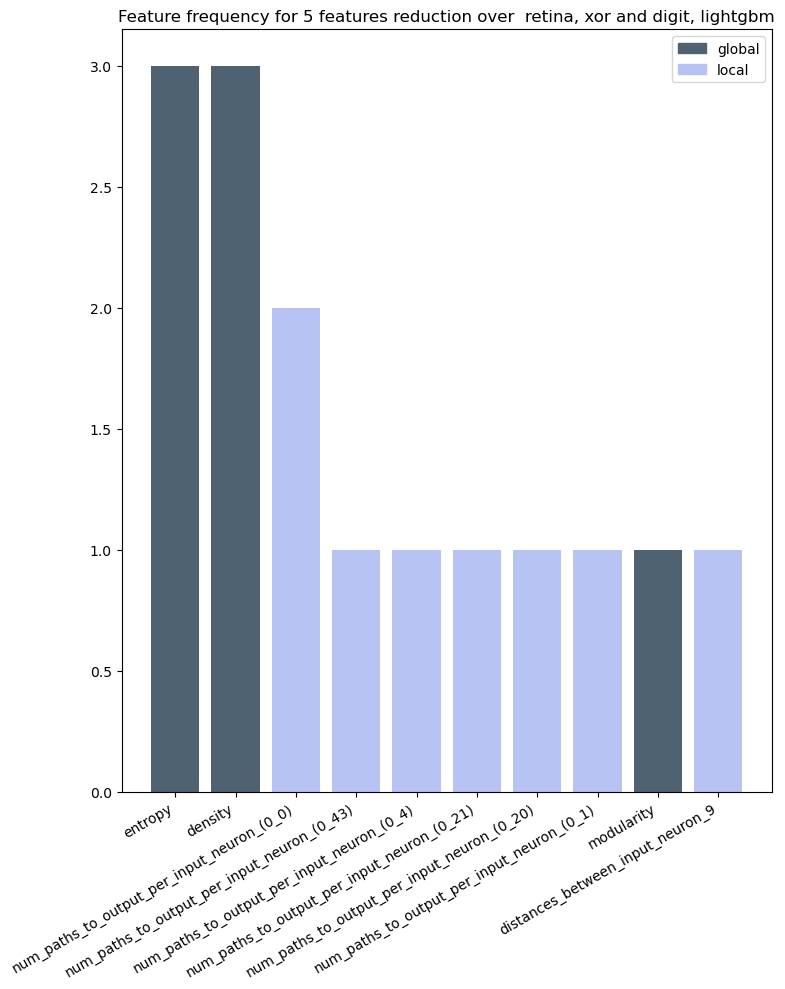

In [153]:
num_uses, features, bar_colors, bar_labels = prepare_data_of_used_features(used_features_lightgbm)
plot_num_uses_global_local(num_uses, features, bar_colors, bar_labels,
                           title_sufix=' retina, xor and digit, lightgbm',
                               time_str=time_str,
    local_base_path=local_base_path,)


In [161]:
digit_used_features_csv_path_lightgbm_no_mod_with_mot = '/digits/digits_lightgbm_feature_selection/with_motifs_no_modularity/exp_2023-08-01-15-10-49/2023-08-01-15-10-49_5_5_used_features.csv'
csvs_mapping_no_mod_with_mot_light_gbm = {
    'retina_lightgbm': retina_used_features_csv_path_lighgbm_no_mod_with_mot,
    'xor_lightgbm': xor_used_features_csv_path_lighgbm_no_mod_with_mot,
    'digit_light_gbm': digit_used_features_csv_path_lightgbm_no_mod_with_mot,

}

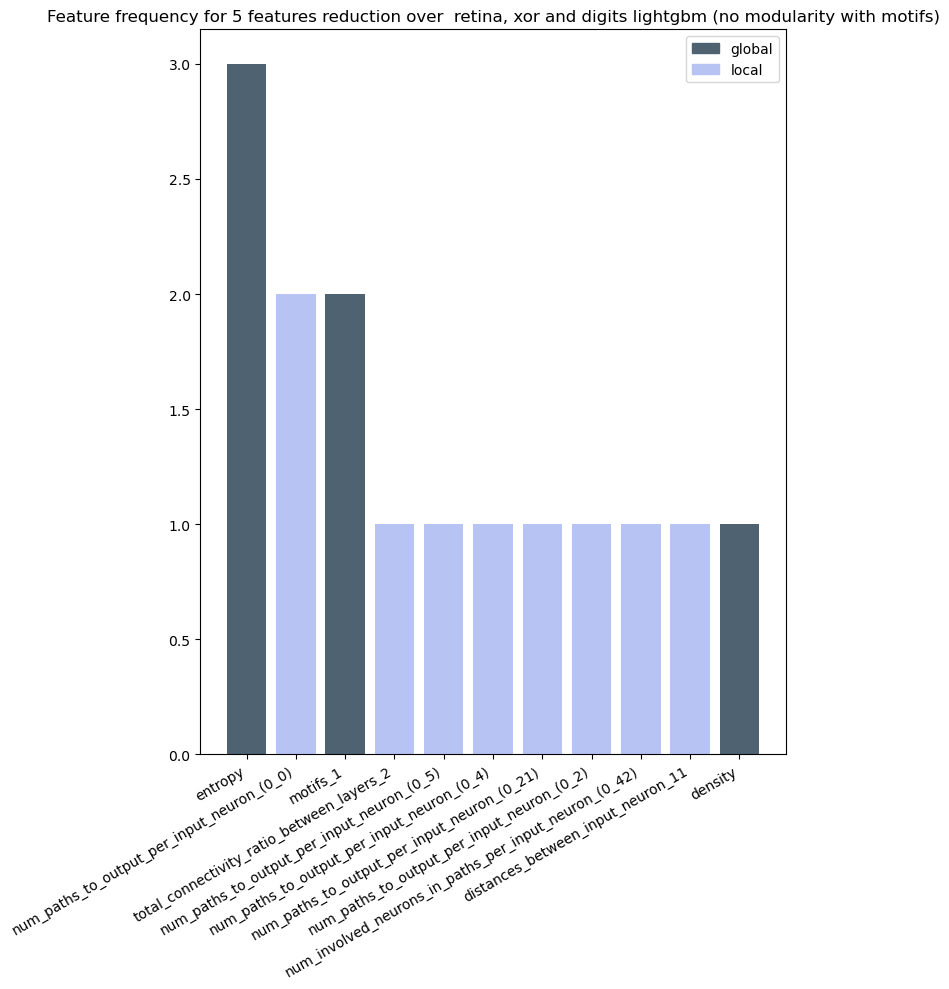

In [162]:
used_features_lightgbm_no_mod_with_motifs = collect_num_uses_different_exp(
    base_path=base_path,
    csvs_mapping=csvs_mapping_no_mod_with_mot_light_gbm,
    num_features=num_features,
)
num_uses, features, bar_colors, bar_labels = prepare_data_of_used_features(used_features_lightgbm_no_mod_with_motifs)
plot_num_uses_global_local(num_uses, features, bar_colors, bar_labels,
                               time_str=time_str,
    local_base_path=local_base_path,
                           title_sufix=' retina, xor and digits lightgbm (no modularity with motifs)')
